# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [145]:
import pandas as pd
df_food = pd.read_csv('nutrition.csv')
df_food

FDC_ID  ... Vitamin C
0     167512  ...       NaN
1     167513  ...    0.1 mg
2     167514  ...       NaN
3     167515  ...       NaN
4     167516  ...    0.0 mg
...      ...  ...       ...
7788  175300  ...    0.0 mg
7789  175301  ...    0.0 mg
7790  175302  ...    0.0 mg
7791  175303  ...    0.0 mg
7792  175304  ...    0.0 mg

[7793 rows x 12 columns]

## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

**0**
Initially, I conducted an examination of the dataset, addressing missing data and rectifying any discrepancies. Following this, I focused on cleaning the dataset by removing extraneous symbols and converting values to the appropriate float type. This meticulous data preprocessing ensures a more accurate and standardized representation, laying a solid foundation for subsequent analyses.

Next, we'll use visuals like scatter plots to quickly understand patterns in key nutritional components, aiding informed decisions in dietary assessments.
**1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?**
To identify the fruit with the highest vitamin C content, I grouped the data and determined the maximum value in the fruit group. Additionally, I provided a list of the top 10 foods with the highest vitamin C content. This quick reference allows users to easily recognize the diverse sources of vitamin C, spanning various food groups.
**2. Describe the relationship between the calories and water content of a food item.**
Upon examination of the heatmap plot and scatter plot, a notable inverse relationship between water content and calorie values is observed.
**3.a. What are the possible drawbacks of a zero-carb diet?**
I separated the dataset into two dataframes based on carbohydrate content: one with zero and another with non-zero values. Using scatter plots, I visually explored relationships. Further, I performed a two-sample t-test to assess differences. Calculating average values for fiber and vitamin C in each category provided additional evidence. The results, visually depicted, highlight meaningful impacts on nutrient composition related to carbohydrate content.
**3.b. What could be the drawbacks of a very high-protein diet?**
Through meticulous grouping of the data into distinct food categories, we calculated the mean values to discern the impact of increasing protein content on various parameters. This analytical approach provides a comprehensive visualization, enabling us to observe how other nutritional parameters evolve in response to the ascending levels of protein across diverse food categories
**4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.**
I applied a linear model, but the outcomes were not deemed satisfactory.
**5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.**
Upon a careful examination of the heat map, which includes residuals as a key indicator of model accuracy, it becomes evident that 'Alcohol' emerges as a significant source of energy that demands consideration in our predictive model. The integration of 'Alcohol' as an additional source of energy into the model has yielded remarkable improvements, bringing the predicted values significantly closer to those endorsed by the Cleveland Clinic.

**recomendations**
For further improvement, consider incorporating the influence of fiber on calorie content in your linear model. Explore how the addition of fiber as a predictor affects the model's predictive accuracy. This may involve adjusting feature weights, exploring interaction terms, or even considering polynomial features to capture non-linear relationships. Evaluating the model's performance after accounting for the impact of fiber can provide valuable insights and potentially enhance its overall predictive capabilities.

first we take look at data and fixing missing data tehn eleminating extra symbols and converting the value to float type

In [146]:
import pandas as pd
df_food = pd.read_csv('nutrition.csv')
df_food
print(df_food.info())

columns_to_fill = ['Cholesterol', 'Fiber', 'Alcohol', 'Vitamin C']
df_food[columns_to_fill] = df_food[columns_to_fill].fillna(0)
null_values = df_food.isnull().sum()

import pandas as pd

# Replace df_food with the actual name of your DataFrame

# Remove 'kcal' from 'Calories'
df_food['Calories'] = df_food['Calories'].str.replace('kcal', '').astype(float)

# Remove 'g' from specified columns and convert to float
columns_to_process_g = ['Protein', 'Carbohydrate', 'Total fat', 'Fiber', 'Water', 'Alcohol']
df_food[columns_to_process_g] = df_food[columns_to_process_g].replace('g', '', regex=True).astype(float)

# Remove 'mg' from specified columns and convert to float
columns_to_process_mg = ['Cholesterol', 'Vitamin C']
df_food[columns_to_process_mg] = df_food[columns_to_process_mg].replace('mg', '', regex=True).astype(float)

# Now, the specified suffixes have been removed, and the values are converted to float
print(df_food.info())
df_food

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item  

FDC_ID  ... Vitamin C
0     167512  ...       0.0
1     167513  ...       0.1
2     167514  ...       0.0
3     167515  ...       0.0
4     167516  ...       0.0
...      ...  ...       ...
7788  175300  ...       0.0
7789  175301  ...       0.0
7790  175302  ...       0.0
7791  175303  ...       0.0
7792  175304  ...       0.0

[7793 rows x 12 columns]

Next, we'll use visuals like scatter plots to quickly understand patterns in key nutritional components, aiding informed decisions in dietary assessments.

Descriptive Statistics (excluding 'FDC_ID'):
          Calories      Protein  ...      Alcohol    Vitamin C
count  7793.000000  7793.000000  ...  7793.000000  7793.000000
mean    220.243118    11.926873  ...     0.127679     8.444604
std     168.752033    10.859968  ...     1.643964    66.031427
min       0.000000     0.000000  ...     0.000000     0.000000
25%      91.000000     2.270000  ...     0.000000     0.000000
50%     183.000000     8.980000  ...     0.000000     0.000000
75%     317.000000    20.770000  ...     0.000000     2.700000
max     902.000000    88.320000  ...    42.500000  2732.000000

[8 rows x 9 columns]

Interquartile Range (IQR):
Calories        226.00
Protein          18.50
Carbohydrate     27.12
Total fat        12.70
Cholesterol      69.00
Fiber             2.10
Water            39.82
Alcohol           0.00
Vitamin C         2.70
dtype: float64

Lower Bound for Outliers:
Calories       -248.00
Protein         -25.48
Carbohydrate    -40.68
Total fat       -18.

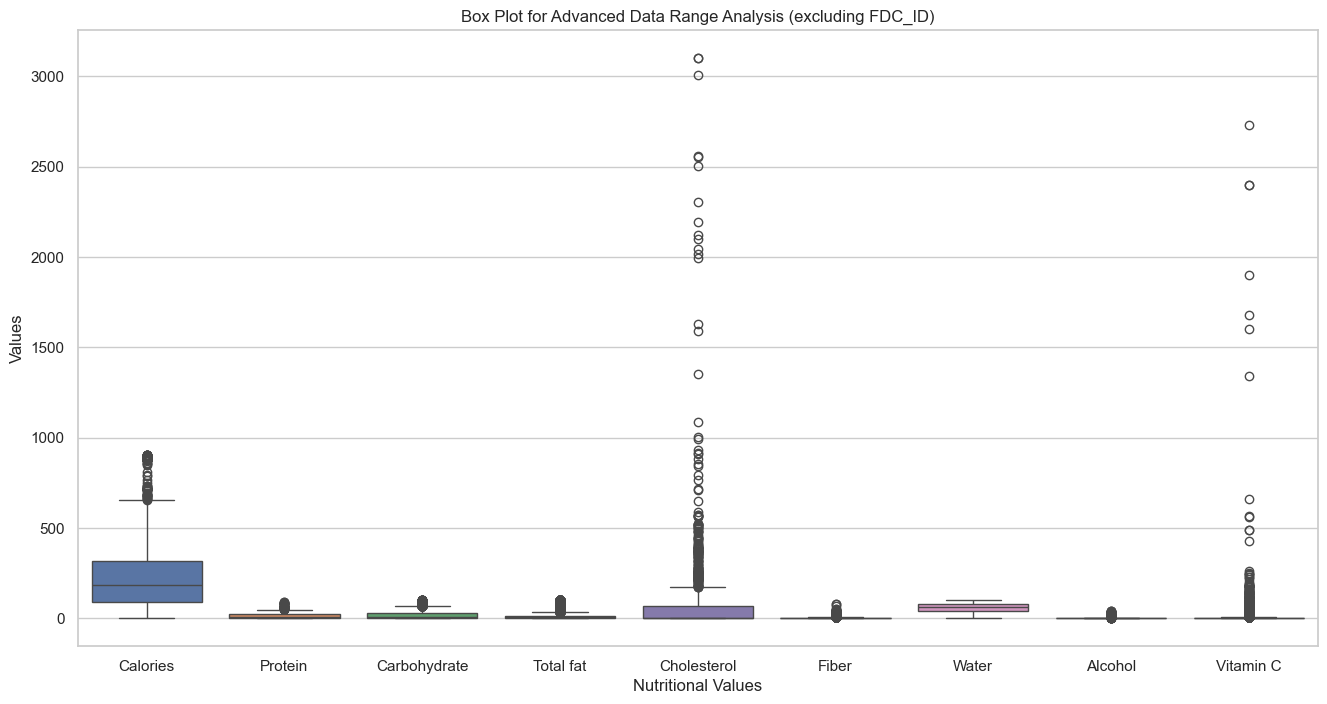

Min and Max Values for Each Column:
     FDC_ID                                  Item  ... Alcohol  Vitamin C
min  167512  APPLEBEE'S, 9 oz house sirloin steak  ...     0.0        0.0
max  175304                              Zwieback  ...    42.5     2732.0

[2 rows x 12 columns]
Rows with Minimum Values for Each Column (excluding specified columns):
     FDC_ID  ... Vitamin C
472  175040  ...       0.0
61   168002  ...       0.0
472  175040  ...       0.0
90   171850  ...       0.0
0    167512  ...       0.0
2    167514  ...       0.0
990  169896  ...       0.0
0    167512  ...       0.0
0    167512  ...       0.0

[9 rows x 12 columns]

Rows with Maximum Values for Each Column (excluding specified columns):


FDC_ID  ... Vitamin C
2581  171400  ...       0.0
4620  174276  ...       0.0
990   169896  ...       0.0
1883  167625  ...       0.0
5684  168624  ...      10.5
5501  170289  ...       0.0
2313  173234  ...       0.0
2334  173664  ...       0.0
3449  173487  ...    2732.0

[9 rows x 12 columns]

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for better styling

# Exclude 'FDC_ID' column from the analysis
columns_to_exclude = ['FDC_ID']
df_food_filtered = df_food.drop(columns=columns_to_exclude)

# Calculate descriptive statistics
stats = df_food_filtered.describe()

# Calculate interquartile range (IQR)
iqr = stats.loc['75%'] - stats.loc['25%']

# Calculate upper and lower bounds for outliers
lower_bound = stats.loc['25%'] - 1.5 * iqr
upper_bound = stats.loc['75%'] + 1.5 * iqr

# Display the calculated statistics
print("Descriptive Statistics (excluding 'FDC_ID'):")
print(stats)
print("\nInterquartile Range (IQR):")
print(iqr)
print("\nLower Bound for Outliers:")
print(lower_bound)
print("\nUpper Bound for Outliers:")
print(upper_bound)

# Using seaborn for better styling
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Create a box plot
sns.boxplot(data=df_food_filtered)
plt.title('Box Plot for Advanced Data Range Analysis (excluding FDC_ID)')
plt.xlabel('Nutritional Values')
plt.ylabel('Values')

# Show the plot
plt.show()

# Calculate min and max values for each column
min_max_values = df_food.agg(['min', 'max'])

# Display the resulting DataFrame
print("Min and Max Values for Each Column:")
print(min_max_values)

# Assuming df_food is your DataFrame
# Replace df_food with the actual name of your DataFrame

# Columns to exclude from the analysis
columns_to_exclude = ['FDC_ID', 'Item', 'Category']

# Exclude specified columns for finding min and max values
df_food_filtered = df_food.drop(columns=columns_to_exclude)

# Find the indices (row labels) of the minimum values for each column
min_indices = df_food_filtered.idxmin()

# Find the indices (row labels) of the maximum values for each column
max_indices = df_food_filtered.idxmax()

# Display the entire rows corresponding to the min and max values for each column
min_rows = df_food.loc[min_indices]
max_rows = df_food.loc[max_indices]

# Display only relevant columns for min and max rows
relevant_columns = columns_to_exclude + list(df_food_filtered.columns)

print("Rows with Minimum Values for Each Column (excluding specified columns):")
print(min_rows[relevant_columns])

print("\nRows with Maximum Values for Each Column (excluding specified columns):")
max_rows[relevant_columns]





1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

The fruit with the highest vitamin C content is  'Acerola, (west indian cherry), raw' but there are some other sources that are rich in vitamin C


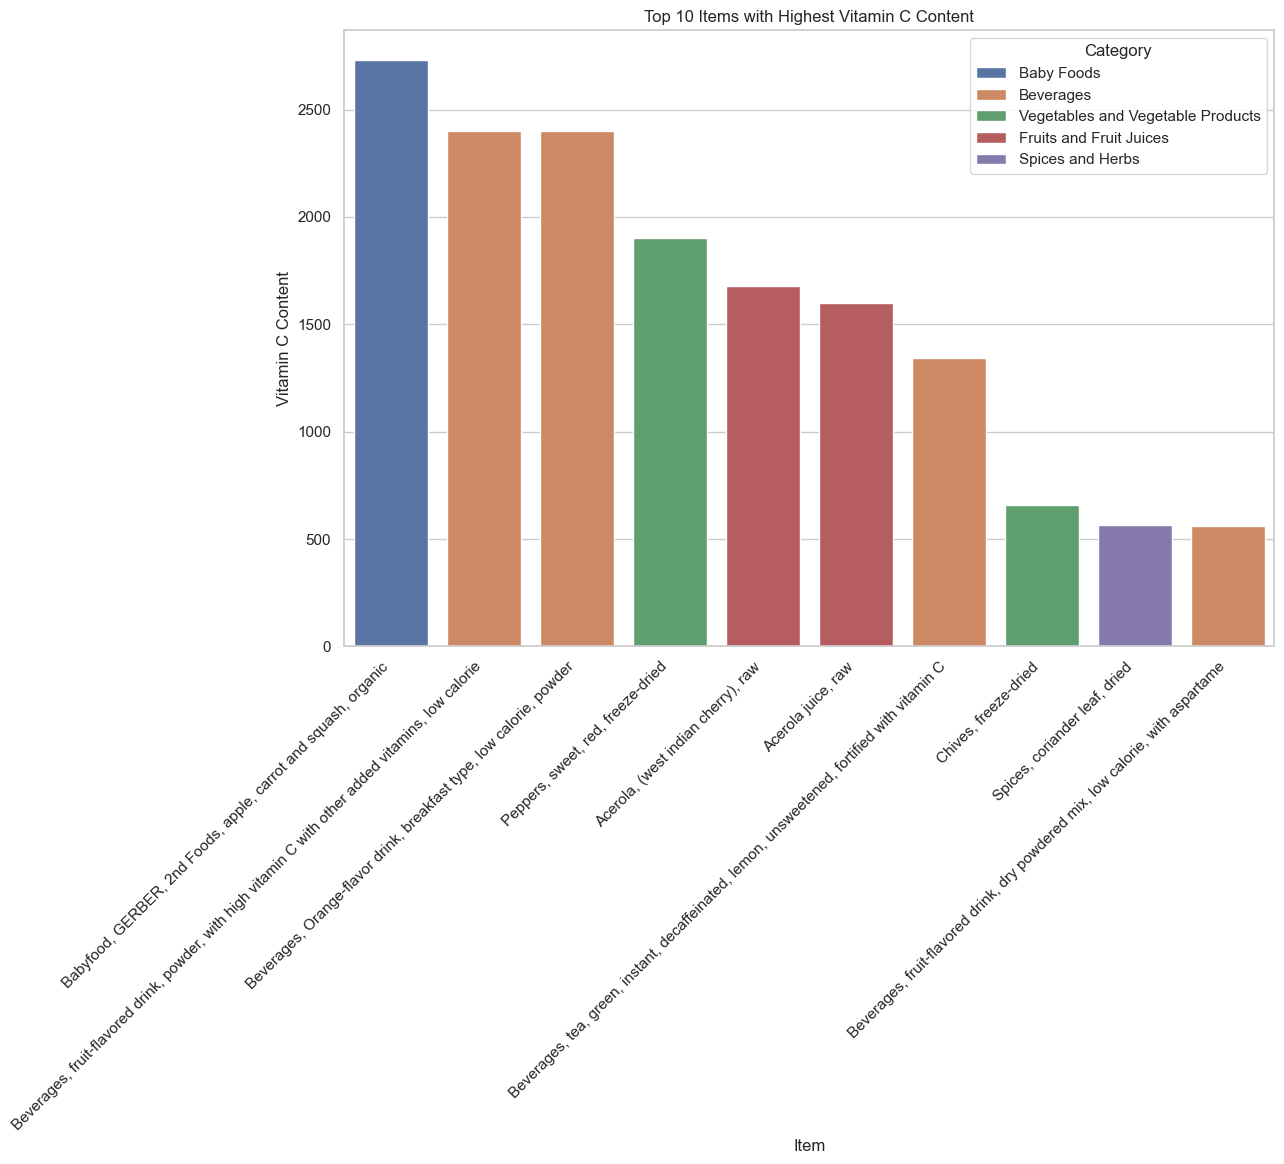

In [148]:
# Group by the 'Category' column
grouped_by_category = df_food.groupby('Category')

# Find the index (row label) with the maximum value for Vitamin C in each group
max_vitamin_c_indices = grouped_by_category['Vitamin C'].idxmax()

# Display the entire rows corresponding to the max Vitamin C value for each group
max_vitamin_c_rows = df_food.loc[max_vitamin_c_indices]

#"Rows with Maximum Value for Vitamin C in Each Category:")

fruit_max_vit_C = max_vitamin_c_rows[max_vitamin_c_rows['Category'] == 'Fruits and Fruit Juices']

print(f"The fruit with the highest vitamin C content is  '{fruit_max_vit_C['Item'].values[0]}' but there are some other sources that are rich in vitamin C")

# Sort the DataFrame by Vitamin C content in descending order
sorted_df = df_food.sort_values(by='Vitamin C', ascending=False)

# Select the top 10 items
top_10_items = sorted_df.head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Item', y='Vitamin C', hue='Category', data=top_10_items)
plt.title('Top 10 Items with Highest Vitamin C Content')
plt.xlabel('Item')
plt.ylabel('Vitamin C Content')
plt.xticks(rotation=45, ha='right') 
plt.show()




Describe the relationship between the calories and water content of a food item.

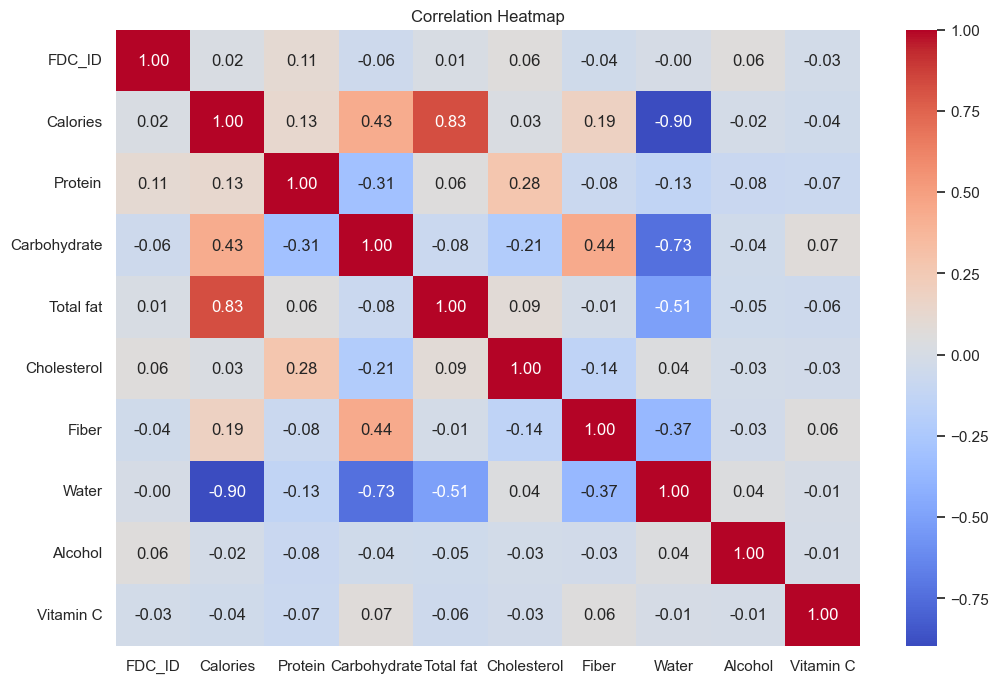

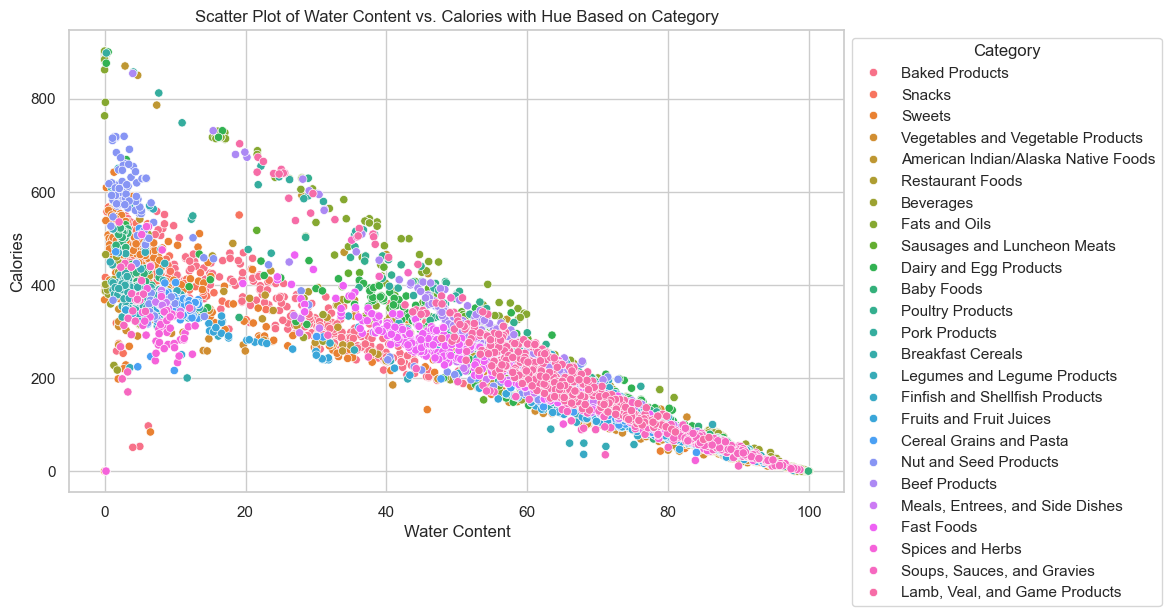

In [149]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_food.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()




# Create a scatter plot with hue based on 'Category'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water', y='Calories', hue='Category', data=df_food)
plt.title('Scatter Plot of Water Content vs. Calories with Hue Based on Category')
plt.xlabel('Water Content')
plt.ylabel('Calories')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()








**Analysis of Water Content and Calorie Relationship:
**

Upon examination of the heatmap plot and scatter plot, a notable inverse relationship between water content and calorie values is observed. In general, as the water content increases, there is a tendency for calorie values to decrease. This trend is particularly pronounced for products with a water content higher than 40 percent.

The heatmap plot, illustrating the correlation matrix, suggests a negative correlation between water content and calories. The scatter plot further supports this observation, showing a downward trend where products with higher water content tend to have lower calorie values.

It's important to note that there appears to be a strong linear relationship, reinforcing the idea that, on average, as the water content of a food item increases, its calorie content decreases. This relationship is particularly evident for products with water content exceeding 40 percent.

These findings emphasize the significance of water content as a potential indicator of calorie levels in food items and provide insights into the overall nutritional composition of the products under consideration.
************************************************************************************************************
************************************************************************************************************

What are the possible drawbacks of a zero-carb diet? 

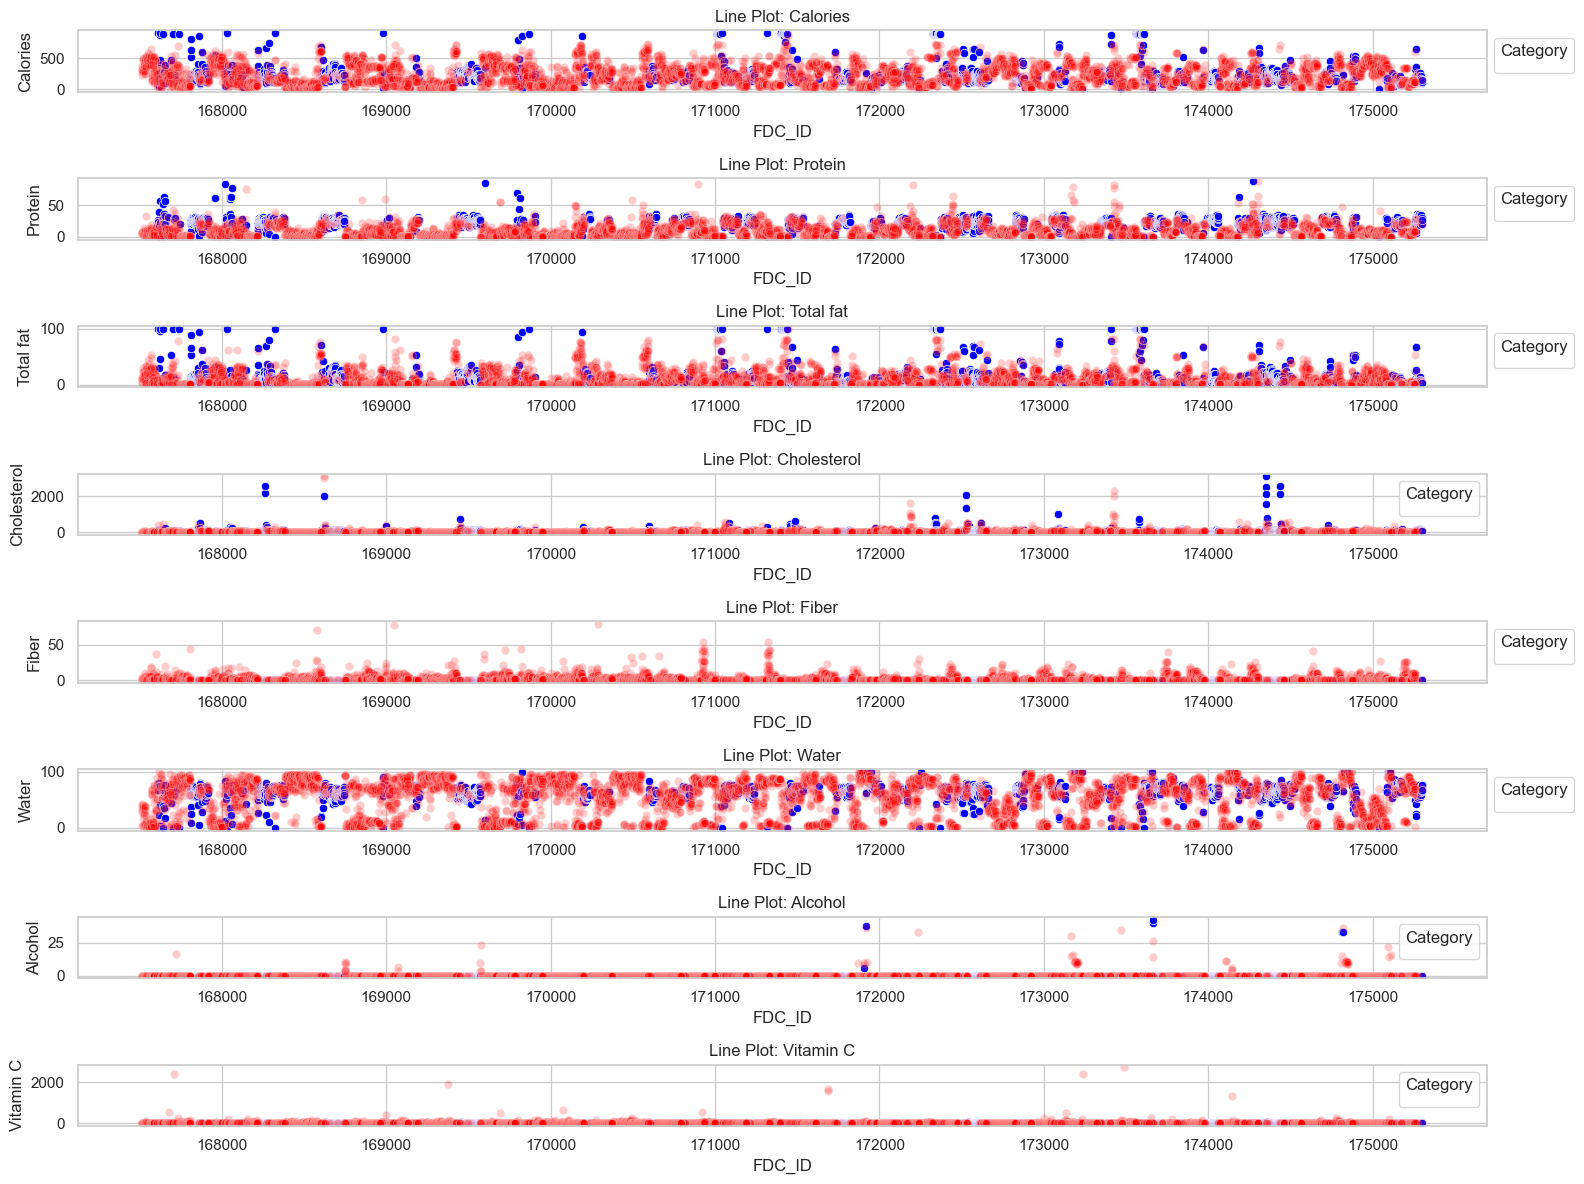

Average Vitamin C for items with no carbohydrates: 0.6694106641721234
Average Fiber for items with no carbohydrates: 0.0
Average Vitamin C for all foods: 8.444604131913255
Average Fiber for all foods: 1.836391633517259


In [150]:
# Selecting columns for plots
# Filter data for items with no carbohydrates
df_food_no_carb = df_food[df_food['Carbohydrate']== 0]
df_food_with_carb = df_food[df_food['Carbohydrate']> 0]
columns_for_plot = ['Calories', 'Protein', 'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C']

# Create individual line plots for each column with hue based on 'Category'
plt.figure(figsize=(16, 12))

for i, col in enumerate(columns_for_plot):
    plt.subplot(8, 1, i+1)
    sns.scatterplot(x='FDC_ID', y=col, color = 'blue', data=df_food_no_carb)
    sns.scatterplot(x='FDC_ID', y=col,color ='red', data=df_food_with_carb, alpha= 0.2)
    plt.title(f'Line Plot: {col}')
    plt.xlabel('FDC_ID')
    plt.ylabel(col)
    plt.legend(title='Category', bbox_to_anchor=(1, 1))
    plt.tight_layout()

plt.show()



# Calculate the average values of 'Vitamin C' and 'Fiber' for items with no carbohydrates
avg_vitamin_c_no_carb = df_food_no_carb['Vitamin C'].mean()
avg_fiber_no_carb = df_food_no_carb['Fiber'].mean()

# Calculate the average values of 'Vitamin C' and 'Fiber' for all foods
avg_vitamin_c_all_foods = df_food['Vitamin C'].mean()
avg_fiber_all_foods = df_food['Fiber'].mean()

# Print the results
print(f"Average Vitamin C for items with no carbohydrates: {avg_vitamin_c_no_carb}")
print(f"Average Fiber for items with no carbohydrates: {avg_fiber_no_carb}")
print(f"Average Vitamin C for all foods: {avg_vitamin_c_all_foods}")
print(f"Average Fiber for all foods: {avg_fiber_all_foods}")



To support my observation that the average value of Vitamin C for no-carb foods is significantly lower than the average value for all foods, we can perform statistical tests and visualizations. 

In [151]:
#Perform a two-sample t-test to compare the average Vitamin C values for foods with and without carbohydrates.
#The null hypothesis (H0) indicated that there is no significant difference in the average Vitamin C values between the two groups.
# The alternative hypothesis (H1) would be that there is a significant difference.
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df_food_no_carb['Vitamin C'], df_food_with_carb['Vitamin C'], equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -10.393695398040217
P-value: 4.422557832074269e-25


furthermore, We could support our assumption with the help of visualisation. 

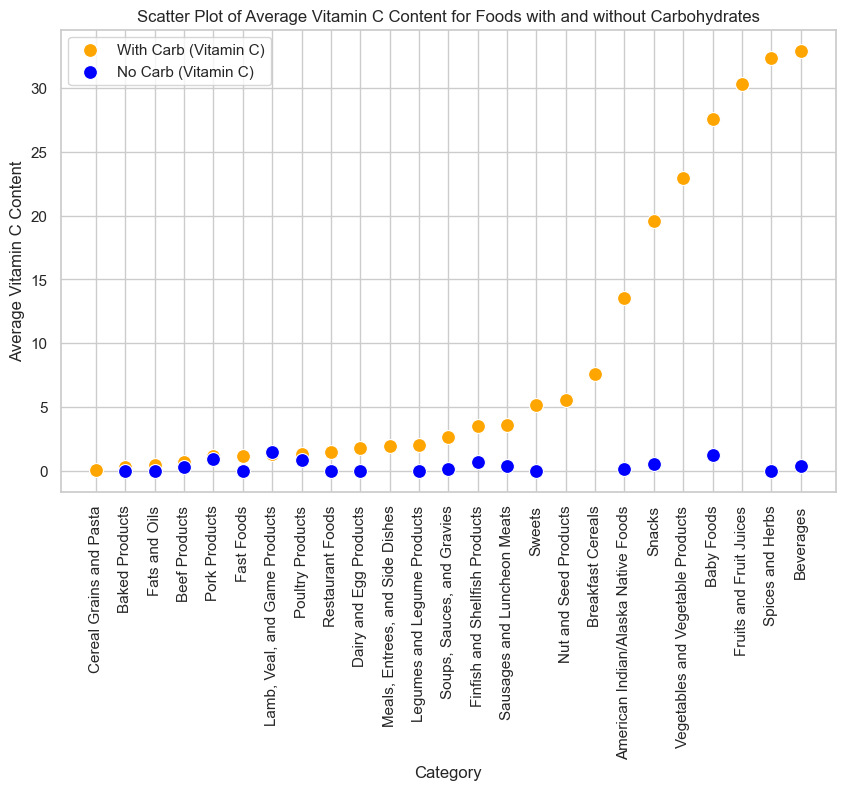

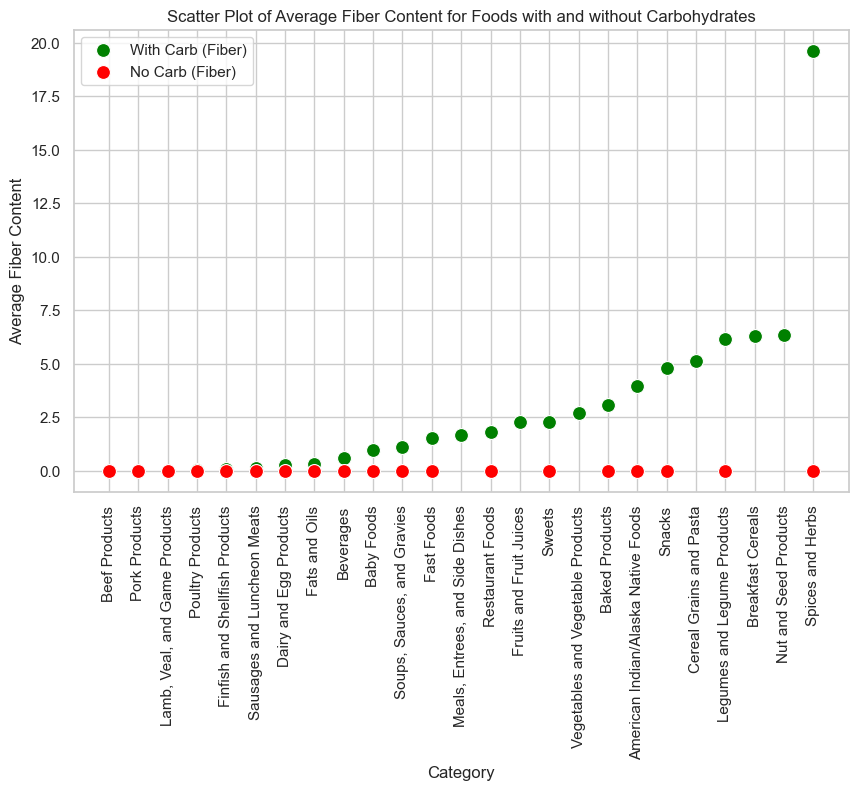

In [152]:
# Calculate average Vitamin C and Fiber for each category in each DataFrame
avg_vitamin_c_no_carb = df_food_no_carb.groupby('Category')['Vitamin C'].mean().reset_index()
avg_fiber_no_carb = df_food_no_carb.groupby('Category')['Fiber'].mean().reset_index()

avg_vitamin_c_with_carb = df_food_with_carb.groupby('Category')['Vitamin C'].mean().reset_index()
avg_fiber_with_carb = df_food_with_carb.groupby('Category')['Fiber'].mean().reset_index()

# Fill missing values with 0
avg_vitamin_c_no_carb = avg_vitamin_c_no_carb.fillna(0)
avg_fiber_no_carb = avg_fiber_no_carb.fillna(0)

avg_vitamin_c_with_carb = avg_vitamin_c_with_carb.fillna(0)
avg_fiber_with_carb = avg_fiber_with_carb.fillna(0)

# Create a scatter plot for Vitamin C
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='Vitamin C', data=avg_vitamin_c_with_carb.sort_values(by='Vitamin C'), label='With Carb (Vitamin C)', color='orange', s=100)
sns.scatterplot(x='Category', y='Vitamin C', data=avg_vitamin_c_no_carb, label='No Carb (Vitamin C)', color='blue', s=100)

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

plt.title('Scatter Plot of Average Vitamin C Content for Foods with and without Carbohydrates')
plt.xlabel('Category')
plt.ylabel('Average Vitamin C Content')
plt.legend()
plt.show()

# Create a separate scatter plot for Fiber
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='Fiber', data=avg_fiber_with_carb.sort_values(by='Fiber'), label='With Carb (Fiber)', color='green', s=100)
sns.scatterplot(x='Category', y='Fiber', data=avg_fiber_no_carb, label='No Carb (Fiber)', color='red', s=100)

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

plt.title('Scatter Plot of Average Fiber Content for Foods with and without Carbohydrates')
plt.xlabel('Category')
plt.ylabel('Average Fiber Content')
plt.legend()
plt.show()


Based on the observed trend in the scatter plot, it is evident that the average values for Vitamin C & Fiber content are notably higher in nearly all food categories with carbohydrates compared to those without carbohydrates. This suggests a potential association between the presence of carbohydrates in food items and elevated levels of Vitamin C & Fiber.

What could be the drawbacks of a very high-protein diet?

"Based on the diagrams and average velues obtaind in the second part of the code, it has been observed that a no-carb diet, represented by items with zero carbohydrate content, tends to show lower average values of both fiber and Vitamin C compared to the average values for all foods. This suggests that eliminating carbohydrates from the diet may impact the intake of essential nutrients such as fiber and Vitamin C. It's important to consider the potential implications of nutrient deficiencies when following a no-carb dietary approach."

What could be the drawbacks of a very high-protein diet?

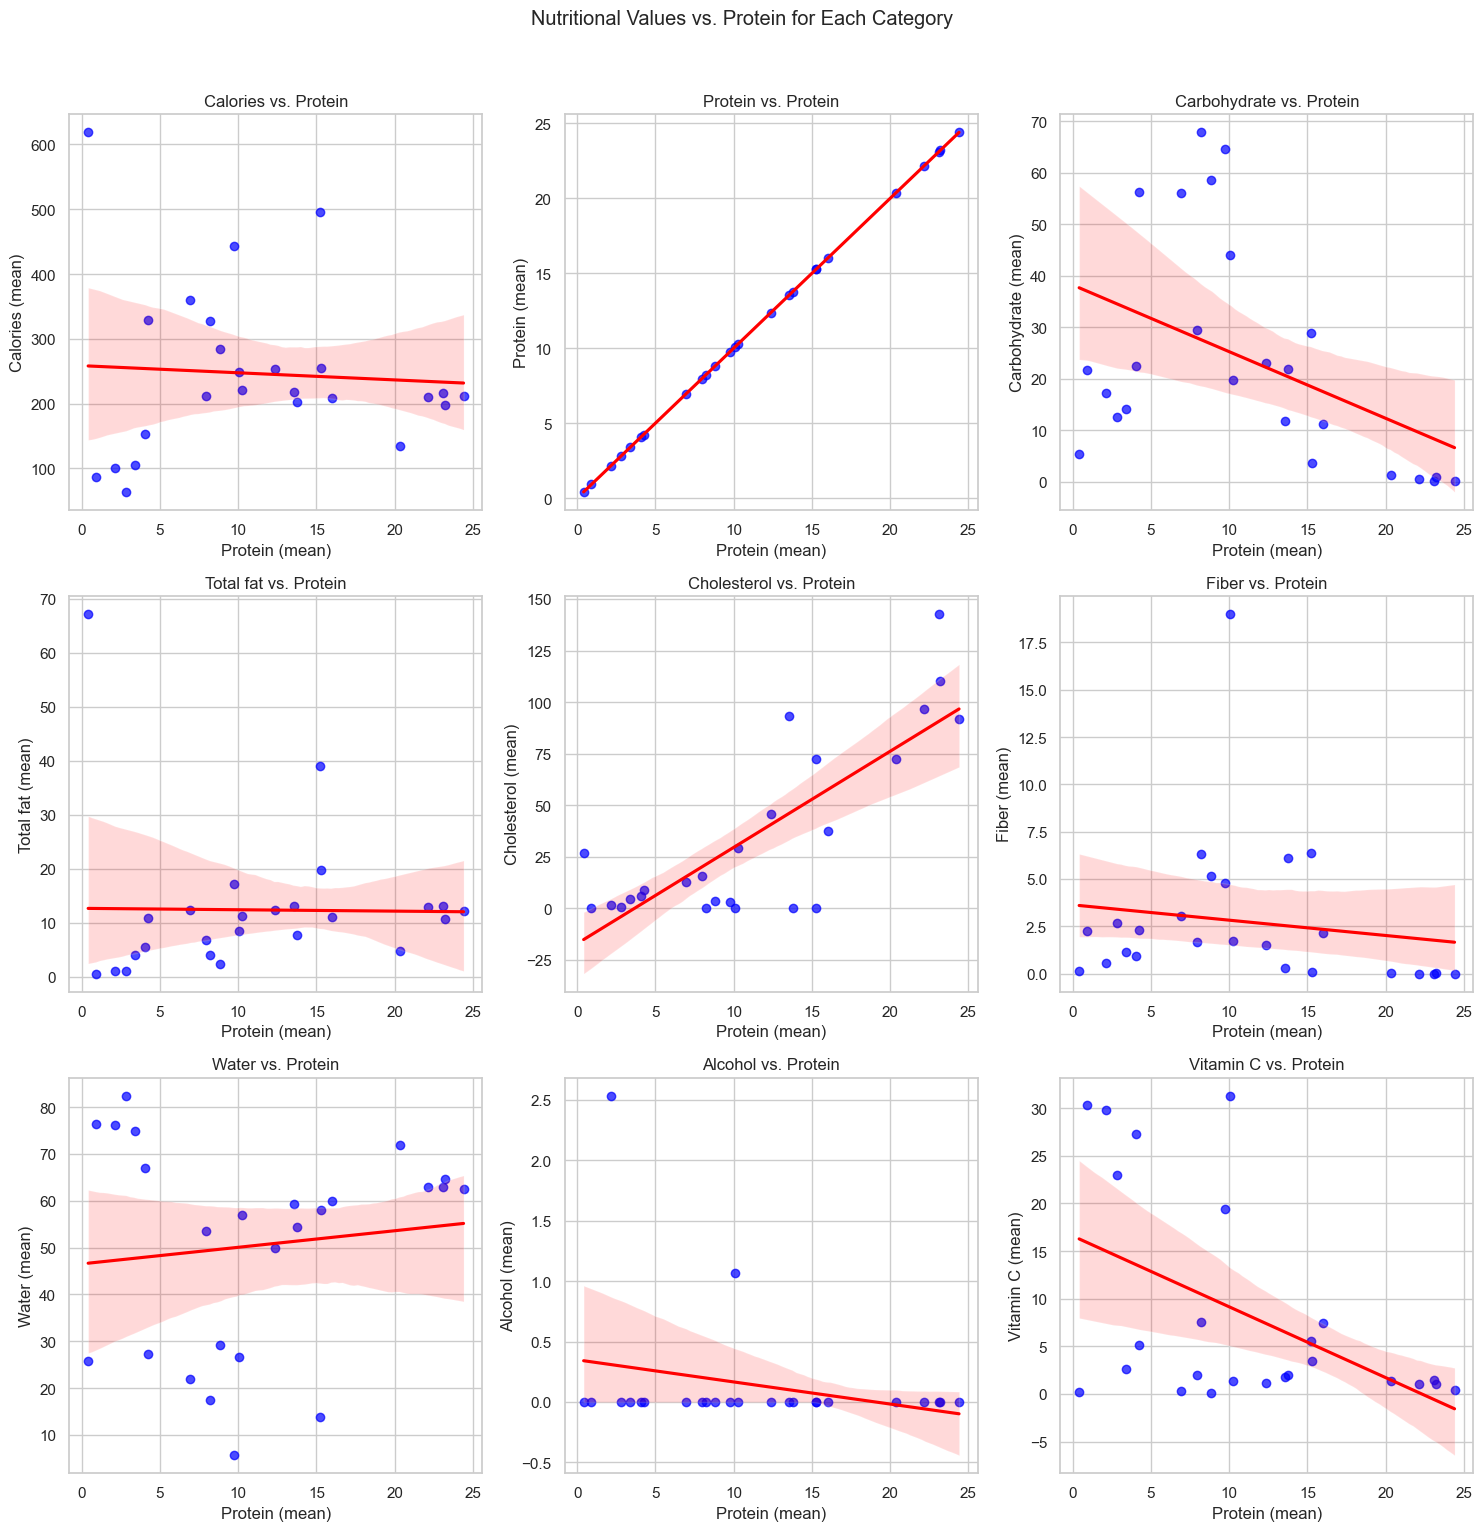

In [153]:

#Through meticulous grouping of the data into distinct food categories, we calculated the mean values to discern the impact of increasing protein content on various parameters. This analytical approach provides a comprehensive visualization, enabling us to observe how other nutritional parameters evolve in response to the ascending levels of protein across diverse food categories.

# List of columns to plot
columns_to_plot = ['Calories', 'Protein', 'Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C']

# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Nutritional Values vs. Protein for Each Category', y=1.02)

# Group by 'Category' and plot a scatter plot with regression line for each column against protein
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3

    result = df_food.groupby('Category').agg({column: 'mean', 'Protein': 'mean'})
    sns.regplot(x='Protein', y=column, data=result, ax=axes[row, col], color='blue', scatter_kws={'alpha':0.7}, line_kws={'color': 'red'})
    
    axes[row, col].set_title(f'{column} vs. Protein')
    axes[row, col].set_xlabel('Protein (mean)')
    axes[row, col].set_ylabel(column + ' (mean)')
    axes[row, col].grid(True)


plt.tight_layout()
plt.show()


Drawing insights from the heat map, a preceding scatter plot, and the calculated average values, a robust correlation is indicated between elevated protein content and a higher percentage of cholesterol.
To reinforce this notion, consider the accompanying scatter plot depicting the average cholesterol values of foods categorized by their protein content—highlighting distinctions between those with high and low protein content. This graphical representation will offer additional clarity on the observed relationship.

According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Extracting 'Total fat', 'Protein', and 'Carbohydrate' columns from the DataFrame
X_multiple = df_food[['Total fat', 'Protein', 'Carbohydrate']]
y_multiple = df_food['Calories']

# Create a linear regression model
model_multiple = LinearRegression()

# Fit the model to the data
model_multiple.fit(X_multiple, y_multiple)

# Make predictions on the same data
y_pred_multiple = model_multiple.predict(X_multiple)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_multiple, y_pred_multiple)
print(f'Mean Squared Error: {mse}')

# Print the coefficients and intercept
print('Coefficients:', model_multiple.coef_)
print('Intercept:', model_multiple.intercept_)
import numpy as np

# Nutrient names and corresponding input arrays
nutrient_names = ['Total fat', 'Protein', 'Carbohydrate']
nutrient_inputs = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Make predictions for each nutrient
for nutrient_name, nutrient_input in zip(nutrient_names, nutrient_inputs):
    calories_pred = model_multiple.predict(nutrient_input.reshape(1, -1))
    print(f'Predicted Calories for {nutrient_name} input: {calories_pred[0]}')



Mean Squared Error: 291.7522292268119
Coefficients: [8.80413501 4.00204437 3.79862627]
Intercept: 4.079962044694639
Predicted Calories for Total fat input: 12.884097057093987
Predicted Calories for Protein input: 8.082006415769513
Predicted Calories for Carbohydrate input: 7.878588315608545


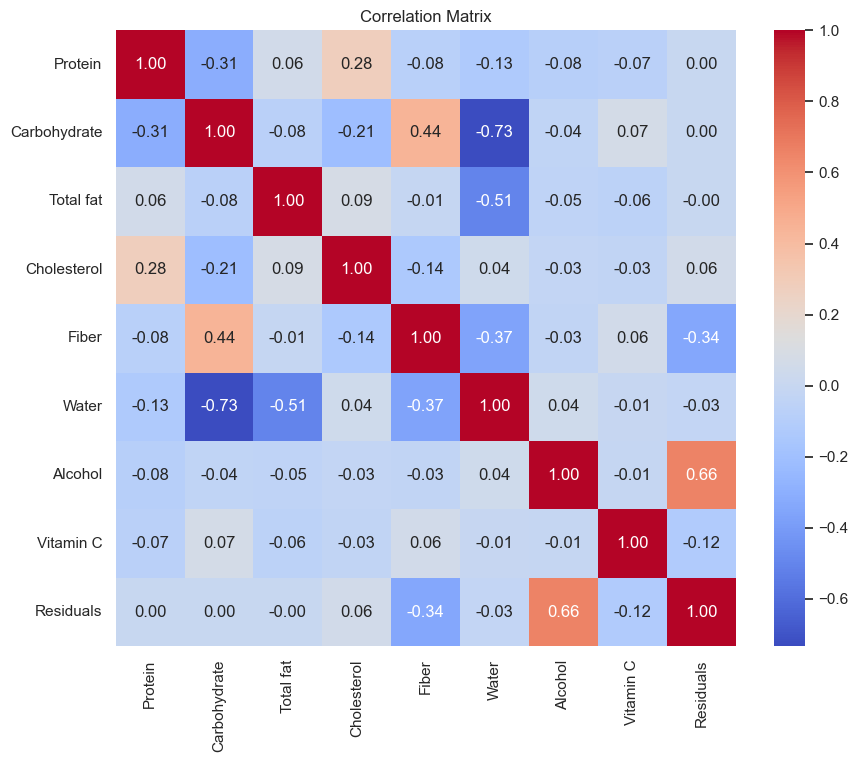

In [155]:
residuals = y_multiple - model_multiple.predict(X_multiple)

# Add residuals to the DataFrame
df_food['Residuals'] = residuals

# Calculate correlation between residuals and each feature
correlation_matrix = df_food[['Protein', 'Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C', 'Residuals']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()






Upon a careful examination of the heat map, which includes residuals as a key indicator of model accuracy, it becomes evident that 'Alcohol' emerges as a significant source of energy that demands consideration in our predictive model. The visual representation of residuals on the heat map highlights the influence of 'Alcohol' on the overall model performance, suggesting its noteworthy impact on caloric predictions.

In [156]:


# Extracting 'Total fat', 'Protein', 'Carbohydrate', and 'Alcohol' columns from the DataFrame
X_multiple = df_food[['Total fat', 'Protein', 'Carbohydrate', 'Alcohol']]
y_multiple = df_food['Calories']

# Create a linear regression model
model_multiple = LinearRegression()

# Fit the model to the data
model_multiple.fit(X_multiple, y_multiple)

# Make predictions on the same data
y_pred_multiple = model_multiple.predict(X_multiple)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_multiple, y_pred_multiple)
print(f'Mean Squared Error: {mse}')

# Print the coefficients and intercept
print('Coefficients:', model_multiple.coef_)
print('Intercept:', model_multiple.intercept_)

# Nutrient names and corresponding input arrays
nutrient_names = ['Total fat', 'Protein', 'Carbohydrate']
nutrient_inputs = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])

# Make predictions for each nutrient
for nutrient_name, nutrient_input in zip(nutrient_names, nutrient_inputs):
    calories_pred = model_multiple.predict(nutrient_input.reshape(1, -1))
    print(f'Predicted Calories for one gram {nutrient_name} input: {calories_pred[0]}')


Mean Squared Error: 164.63016130467702
Coefficients: [8.8379392  4.11108749 3.83092816 6.90701776]
Intercept: 0.9041211223807011
Predicted Calories for one gram Total fat input: 9.742060324589346
Predicted Calories for one gram Protein input: 5.015208607449825
Predicted Calories for one gram Carbohydrate input: 4.735049277519152



The integration of 'Alcohol' as an additional source of energy into the model has yielded remarkable improvements, bringing the predicted values significantly closer to those endorsed by the Cleveland Clinic. These value are as follows: a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each.